# Задание на лабораторную работу №2. Pandas и основы python
## Общее задание
1. Сгенерировать с использованием библиотеки pandas csv файл, содержащий 3 столбца: $x_1$, $x_2$, $y$ (> 400 строк, генерация с использованием функции linspace). Вид функции определяется вариантом (диапазон выбирается студентом).
2. Открыть файл с использованием библиотеки pandas и построить графики: $y(x_1)$ ($x_2$ - константа), $y(x_2)$  ($x_1$ - константа). Графики необходимо построить с использованием matplotlib (для функции y отобразить точки на графике). 
3. Вывести для каждого столбца $(x_1, x_2, y)$: среднее, минимальное и максимальное значения.
4. Сохранить в новый csv файл те строки, для которых выполняется условие: $x_1$ меньше среднее $x_1$ или $x_2$ меньше среднее $x_2$
5. С использованием mplot3D построить 3D график функции $y(x_1, x_2)$ в отдельном окне.

## Варианты
1. $y = sin(x_1 + x_2)$
2. $y = cos(x_1 + x_2)$
3. $y = tan(x_1 + x_2) * sin(x_1)$
4. $y = 2 * x_1^2 + 3x_2^2$
5. $y = 5 * log(x_1) * log(2 * x_2)$
6. $y = 5 * log(x_1) * x_2^2$
7. $y = cos(x_1) * x_2^3$
8. $y = \frac{3}{(2 + e^{-2x})}$
9. $y = cos(x_1 + x_2) * x_2 ^ 2$
10. $y = \frac{x_2}{(1 + e^{-x_1})}$
11. $y = \frac{3 * x_1}{(1 - e^{-x_2})}$
12. $y = 0.01 * tan(x_1) * x_2^2$
13. $y = x_1^6 + x_2^2 + x_1^3 + 4x_2 + 5$
14. $y = cos(x_1) * x_2^3$
15. $y = tan(x_1) * ctg(x_2)$
16. $y = \frac{sin(x_1)}{(1 + e^{-2x_2})}$
17. $y = \frac{cos(x_1)}{(1 + e^{-2x_2})}$
18. $y = \frac{tan(x_1)}{(3 + e^{-2x_2})}$
19. $y = \frac{ctg(x_1)}{(2 + e^{-2x_2})}$
20. $y = \frac{x_1^2}{(1 + e^{-2x_2})}$


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
x1_values = np.linspace(-10, 10, 500)
x2_values = np.linspace(-10, 10, 500)
x1, x2 = np.meshgrid(x1_values, x2_values)
y = np.cos(x1) * x2**3


In [20]:
pd.DataFrame({'x1': x1.flatten(), 'x2': x2.flatten(), 'y': y.flatten()}).to_csv('data.csv', index=False)
readed_csv = pd.read_csv("data.csv")
 
x1 = readed_csv['x1'].values.reshape(x1.shape)
x2 = readed_csv['x2'].values.reshape(x2.shape)
y = readed_csv['y'].values.reshape(y.shape)

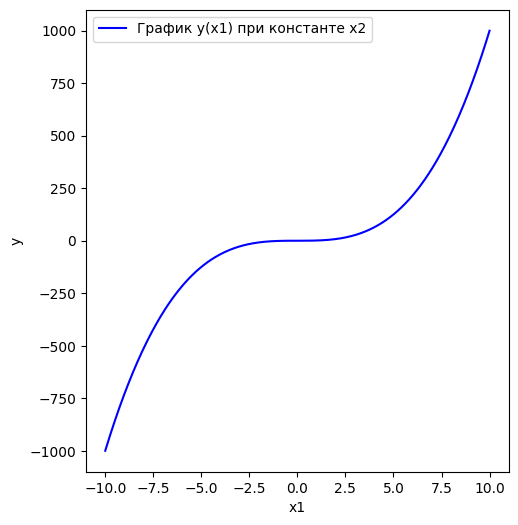

In [22]:
plt.figure(figsize=(12, 6))

# График y(x1) при константе x2
plt.subplot(121)
plt.plot(x1_values, y[:, x2_values.searchsorted(0)], label='График y(x1) при константе x2', color='blue')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()

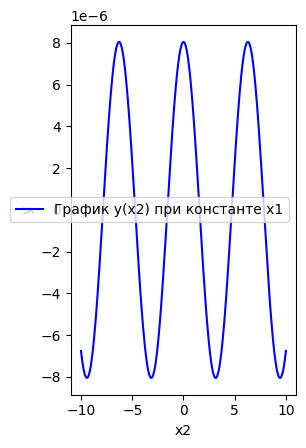

In [24]:
# График y(x2) при константе x1
plt.subplot(122)
plt.plot(x2_values, y[x1_values.searchsorted(0), :], label='График y(x2) при константе x1', color='blue')
plt.xlabel('x2')
plt.ylabel('y')
plt.legend()

In [25]:
for column in ['x1', 'x2', 'y']:
    print(f'{column}:')
    print(f'Среднее: {readed_csv[column].mean()}')
    print(f'Минимум: {readed_csv[column].min()}')
    print(f'Максимум: {readed_csv[column].max()}', end='\n\n')

x1:
Среднее: -3.255991032347083e-16
Минимум: -10.0
Максимум: 10.0

x2:
Среднее: 2.0372681319713592e-16
Минимум: -10.0
Максимум: 10.0

y:
Среднее: 1.979060471057892e-15
Минимум: -999.9889553419
Максимум: 999.9889553419



In [26]:
filtered_data = readed_csv[(readed_csv['x1'] < readed_csv['x1'].mean()) | (readed_csv['x2'] < readed_csv['x2'].mean())]
filtered_data.to_csv('filtered_data.csv', index=False)

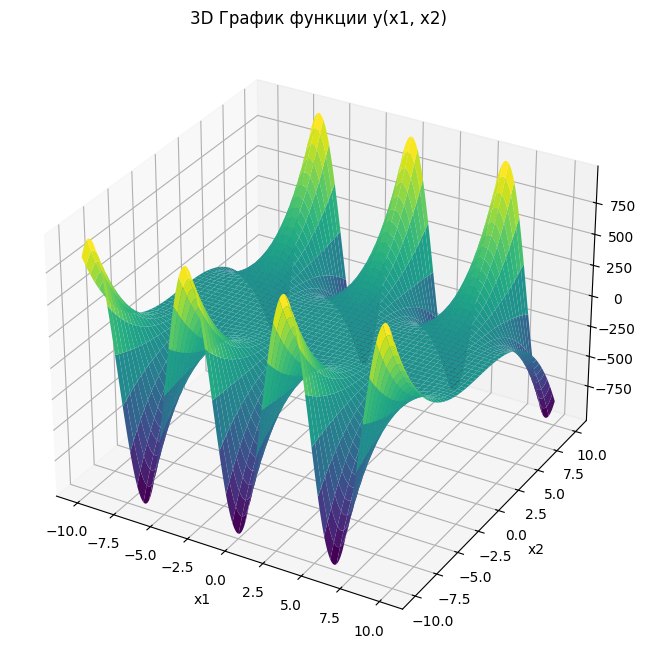

In [27]:
# Построение 3D графика
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x1, x2, y, cmap='viridis')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('3D График функции y(x1, x2)')

plt.show()